In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D




In [170]:
def plot_gp(mu, cov, X, X_train=None, Y_train=None, samples=[]):
    X = X.ravel()
    mu = mu.ravel()
    uncertainty = 1.96 * np.sqrt(np.diag(cov))
    
    plt.fill_between(X, mu + uncertainty, mu - uncertainty, alpha=0.5)
    plt.plot(X, mu, label='Mean')
    for i, sample in enumerate(samples):
        plt.plot(X, sample, lw=1, ls='--', label=f'Sample {i+1}')
    if X_train is not None:
        plt.plot(X_train, Y_train, 'rx')
    plt.legend()

def plot_gp_2D(gx, gy, mu, X_train, Y_train, title, i):
    ax = plt.gcf().add_subplot(1, 2, i, projection='3d')
    ax.plot_surface(gx, gy, mu.reshape(gx.shape), cmap=cm.coolwarm, linewidth=0, alpha=0.2, antialiased=False)
    ax.scatter(X_train[:,0], X_train[:,1], Y_train, c=Y_train, cmap=cm.coolwarm)
    ax.set_title(title)

In [2]:
df = np.genfromtxt("/Users/ednovate/data_GP/AG/block1-UNWEIGHTED-SLOW-NONDOMINANT-RANDOM/20161213203046-59968-right-speed_0.500.csv", delimiter=',')
df1 = np.genfromtxt( "/Users/ednovate/Downloads/data_GP/AG/block2-UNWEIGHTED-SLOW-NONDOMINANT-RANDOM/20161213204004-59968-right-speed_0.500.csv", delimiter=',')
df2 = np.genfromtxt("/Users/ednovate/Downloads/data_GP/AG/block3-UNWEIGHTED-SLOW-NONDOMINANT-RANDOM/20161213204208-59968-right-speed_0.500.csv",delimiter=',')
df3 = np.genfromtxt("/Users/ednovate/Downloads/data_GP/AG/block4-UNWEIGHTED-SLOW-NONDOMINANT-RANDOM/20161213204925-59968-right-speed_0.500.csv",delimiter=',')
df4 = np.genfromtxt("/Users/ednovate/Downloads/data_GP/AG/block5-UNWEIGHTED-SLOW-NONDOMINANT-RANDOM/20161213210121-59968-right-speed_0.500.csv",delimiter=',')

In [3]:
#delete first row of Nans
df = np.delete(df, 0,0)
df1 = np.delete(df1, 0,0)
df2 = np.delete(df2, 0,0)
df3 = np.delete(df3, 0,0)
df4 = np.delete(df4, 0,0)


In [4]:
m,n = np.shape(df)

print(m)
print(n)

type(df)

1030
211


numpy.ndarray

In [5]:
# empty df for frame 1

new_df = np.zeros([50, 5])

new_df_m, new_df_n = np.shape(new_df)

print(new_df_m)

print(new_df_n)

50
5


In [6]:
type(df[1,1])

#store with c value

#number matrix, new_df[m,0] refers to sensor number

df_temp = df.copy()

for m in range(new_df_m):
    new_df[m,0] = m
     

In [7]:
## isolate data for time = 0

j = 0

for i in range(0, 50):
      new_df[j,1] = df[1,11 + 4*i]
      j+=1
   

k = 0

for i  in range(0, 50):
   new_df[k,2] = df[1,12 + 4*i]
   k+=1

l = 0

for i in range(0,50):
    new_df[l,3] = df[1,13 + 4*i]
    l+=1

m = 0

for i in range(0,50):
    new_df[m,4] = df[1,14 + 4*i]
    m+=1   
    

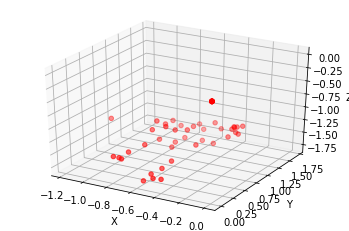

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(new_df[:,1], new_df[:,2],new_df[:,3], color='r')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [9]:
#isolate finger and plot over time
# finger_df[:,0] : elapsed time. 
# finger_df[:,1:5] : 5 different traces by the same person



finger_df = np.zeros([1030,7])
finger_df[:,0] = df[:,0]
finger_df[:,1] = df[:,1]
finger_df[:,2] = df[:,5]
finger_df[:,3] = df1[:,5]
finger_df[:,4] = df2[:,5]
finger_df[:,5] = df3[:,5]
finger_df[:,6] = df4[:,5]


In [10]:
finger_df


array([[ 0.00000000e+00,  2.19302902e-02, -3.19366962e-01, ...,
        -2.75524944e-01, -2.56799549e-01, -2.63551623e-01],
       [ 1.00000000e+00,  3.30045237e-02, -3.17827851e-01, ...,
        -2.76739001e-01, -2.57372230e-01, -2.63364911e-01],
       [ 2.00000000e+00,  4.39107258e-02, -3.15750241e-01, ...,
        -2.77775645e-01, -2.58129835e-01, -2.62277842e-01],
       ...,
       [ 1.02700000e+03,  1.72101492e+01, -2.82162219e-01, ...,
        -2.93787211e-01, -2.74839073e-01, -2.41225123e-01],
       [ 1.02800000e+03,  1.72213627e+01, -2.81993896e-01, ...,
        -2.93742567e-01, -2.75101513e-01, -2.41225123e-01],
       [ 1.02900000e+03,  1.72324135e+01, -2.81701714e-01, ...,
        -2.93955803e-01, -2.75615990e-01, -2.41225123e-01]])

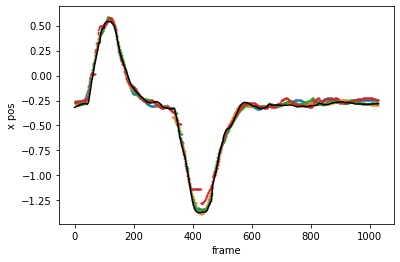

In [11]:
#plot over time
frame_vec = finger_df[:,0]
time_vec = finger_df[:,1]
pos_vec0 = finger_df[:,2]
pos_vec1 = finger_df[:,3]
pos_vec2 = finger_df[:,4]
pos_vec3 = finger_df[:,5]
pos_vec4 = finger_df[:,6]



fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(frame_vec, pos_vec0, 'k')
ax.scatter(frame_vec, pos_vec1, s = 0.5)
ax.scatter(frame_vec, pos_vec2,s = 0.5)
ax.scatter(frame_vec, pos_vec3,s = 0.5)
ax.scatter(frame_vec, pos_vec4, s = 0.5)



ax.set_xlabel('frame')
ax.set_ylabel('x pos')
plt.show()

In [12]:
#isolate finger one trace 0, center data


position_mean = np.mean(pos_vec0)

print(position_mean)

for i in range(len(pos_vec0)):
    pos_vec0[i] = pos_vec0[i]- position_mean
    
    

-0.3381063519083281


In [13]:
#isolate finger one trace 0, center data


position_mean = np.mean(pos_vec1)

print(position_mean)

for i in range(len(pos_vec1)):
    pos_vec1[i] = pos_vec1[i]- position_mean
    

    
#isolate finger one trace 1, center data

position_mean = np.mean(pos_vec2)

print(position_mean)

for i in range(len(pos_vec2)):
    pos_vec2[i] = pos_vec2[i]- position_mean
    

    
    
#isolate finger one trace 2, center data

position_mean = np.mean(pos_vec3)

print(position_mean)

for i in range(len(pos_vec3)):
    pos_vec3[i] = pos_vec3[i]- position_mean
    

    
    
    
#isolate finger one trace 3, center data

position_mean = np.mean(pos_vec4)

print(position_mean)

for i in range(len(pos_vec4)):
    pos_vec4[i] = pos_vec4[i]- position_mean
    

    
    
    


    
    


-0.32296158192503255
-0.32548512940979957
-0.32388674413147306
-0.31041407316357156


In [14]:

#pos_vec_random= np.zeros(1030,)


#for i in range(len(pos_vec_random)):
 #   pos_vec_random[i,]= finger_df[:,i+2 ].sample
    

In [15]:
#reshape for GPR

frame_vec_reshape = np.reshape(frame_vec, (-1,1))
pos_vec0_reshape = np.reshape(pos_vec0, (-1,1))
pos_vec1_reshape = np.reshape(pos_vec0, (-1,1))
pos_vec2_reshape = np.reshape(pos_vec0, (-1,1))
pos_vec3_reshape = np.reshape(pos_vec0, (-1,1))
pos_vec4_reshape = np.reshape(pos_vec0, (-1,1))


In [16]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF, WhiteKernel
from matplotlib import figure

#generate data

#rng = np.random.RandomState(0)
#X = rng.uniform(0, 5, 20)[:, np.newaxis]
#y = 0.5 * np.sin(3 * X[:, 0]) + rng.normal(0, 0.5, X.shape[0])

# First run


plt.figure()
plt.rcParams["figure.figsize"] = (20,20)


#Define kernel
#initialize hyperparameters

kernel = ConstantKernel(1.) * RBF(length_scale=100.0, length_scale_bounds=(1e-2, 150)) \
    + WhiteKernel(noise_level=1, noise_level_bounds=(1e-10, 1e+1))
gp = GaussianProcessRegressor(kernel=kernel,
                              alpha=0.0).fit(frame_vec_reshape, pos_vec0_reshape)

#fill up space with 100 error bars

X_ = np.linspace(0, 1030, 1030)


#use predictive dist 
#X data frame goes from 1d to 2d




y_mean, y_cov = gp.predict(X_[:, np.newaxis], return_cov=True)






<Figure size 432x288 with 0 Axes>

In [17]:

#rethink mean line?

mean_line = np.zeros(1030,)

for i in range(len(mean_line)):
    mean_line[i] = np.mean(pos_vec0)
    

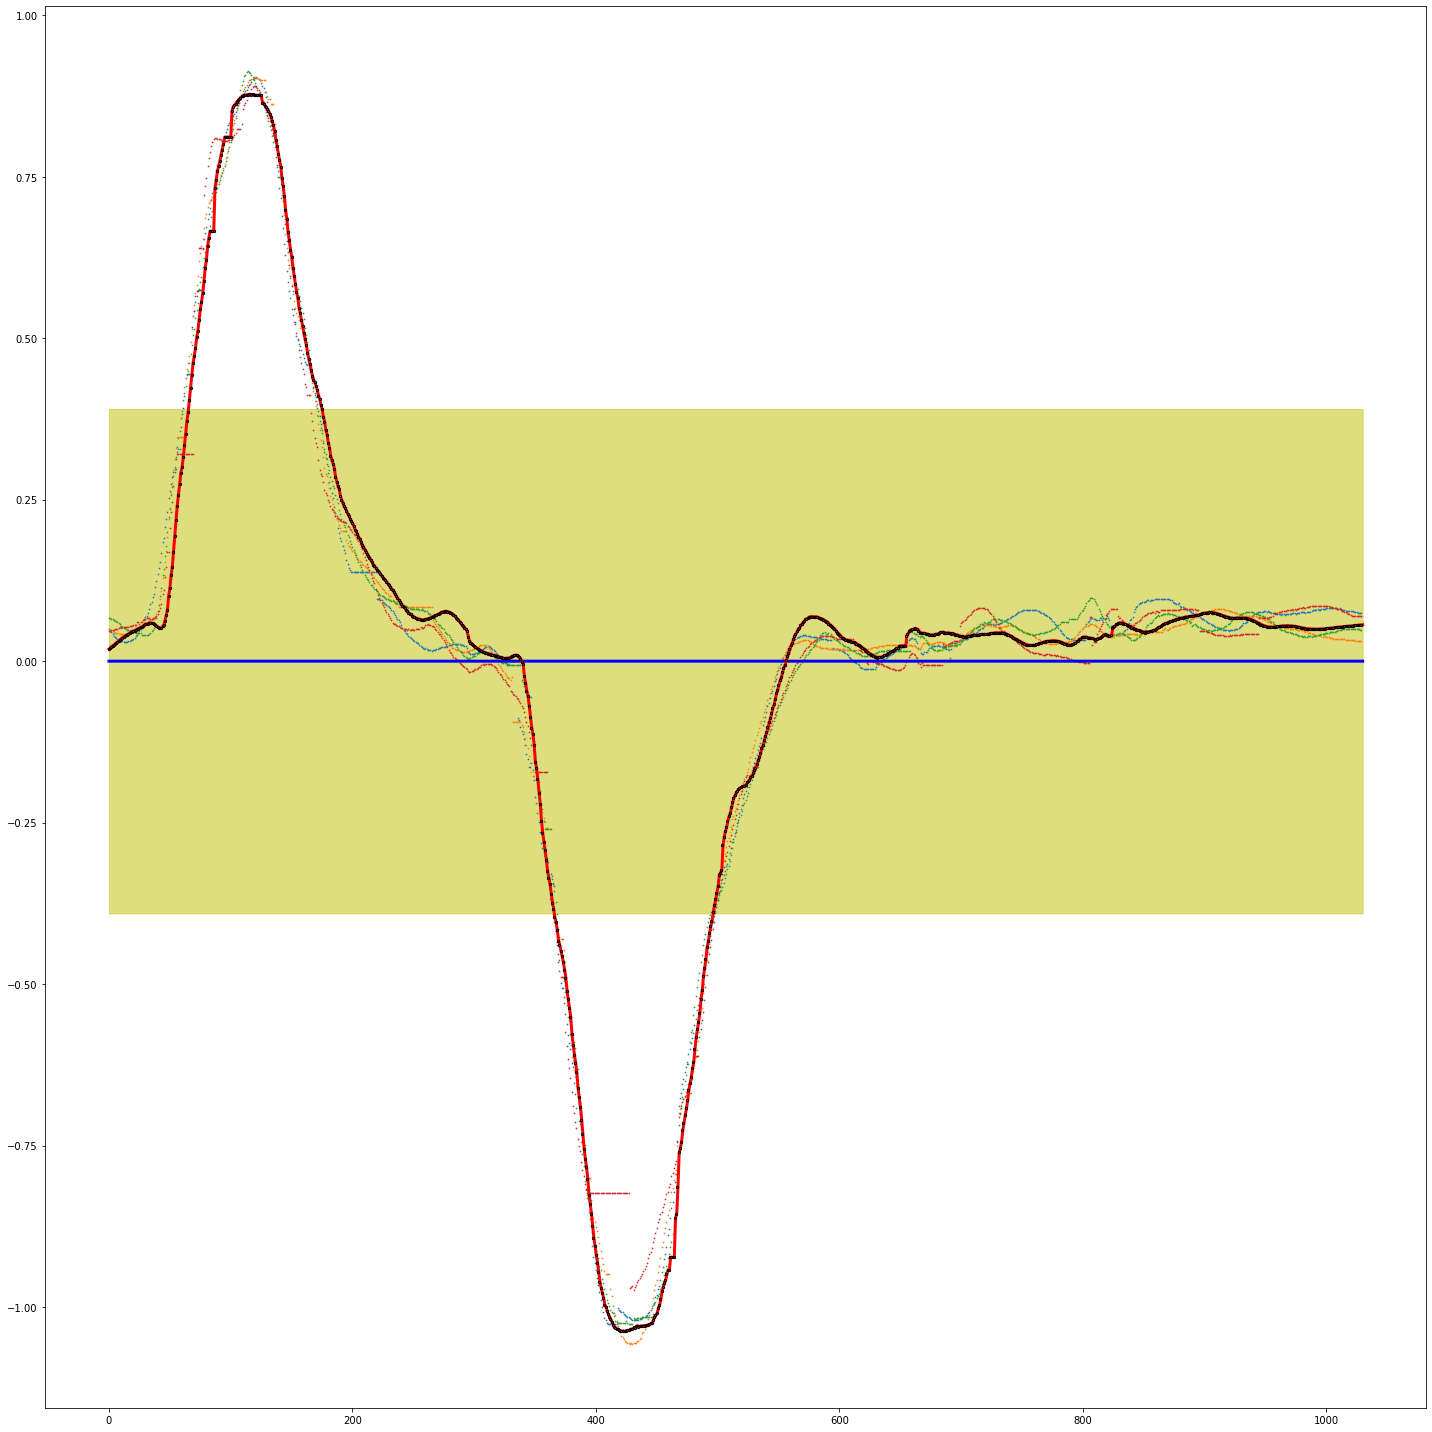

In [18]:
# mean +- cov to establsh band
#plot


plt.plot(X_, mean_line, 'b', lw=3, zorder=9)

#plt.fill_between(X_, y_mean - np.sqrt(np.diag(y_cov)),
 #                y_mean + np.sqrt(np.diag(y_cov)),
  #               alpha=0.5, color='y')




plt.fill_between(X_, mean_line - np.std(pos_vec0), mean_line + np.std(pos_vec0),alpha=0.5, color='y')






#just to show reference function, what should this be replaced by? line plot of og data?
plt.plot(X_, pos_vec0, 'r', lw=3, zorder=9)

plt.scatter(frame_vec, pos_vec1, s = 0.5)
plt.scatter(frame_vec, pos_vec2,s = 0.5)
plt.scatter(frame_vec, pos_vec3,s = 0.5)
plt.scatter(frame_vec, pos_vec4, s = 0.5)



plt.scatter(frame_vec_reshape[:, 0], pos_vec0_reshape, c='r', s=5, zorder=10, edgecolors=(0, 0, 0))
#plt.title("Initial: %s\nOptimum: %s\nLog-Marginal-Likelihood: %s"
         # % (kernel, gp.kernel_,
          #   gp.log_marginal_likelihood(gp.kernel_.theta)))
plt.tight_layout()


In [19]:
y_mean

array([[0.01881777],
       [0.02033874],
       [0.02195102],
       ...,
       [0.05616556],
       [0.05626634],
       [0.05629439]])

In [20]:
print(np.shape(y_mean))
print(np.shape(y_cov))

print(np.shape(y_mean - np.sqrt(np.diag(y_cov))))

y_mean = np.squeeze(y_mean)
print(np.shape(y_mean))



(1030, 1)
(1030, 1030)
(1030, 1030)
(1030,)


In [21]:
y1 = y_mean - np.sqrt(np.diag(y_cov))
np.shape(y1)

print(np.sqrt(np.diag(y_cov)))


[0.00463642 0.00408295 0.00396872 ... 0.0040827  0.00463552 0.00608015]


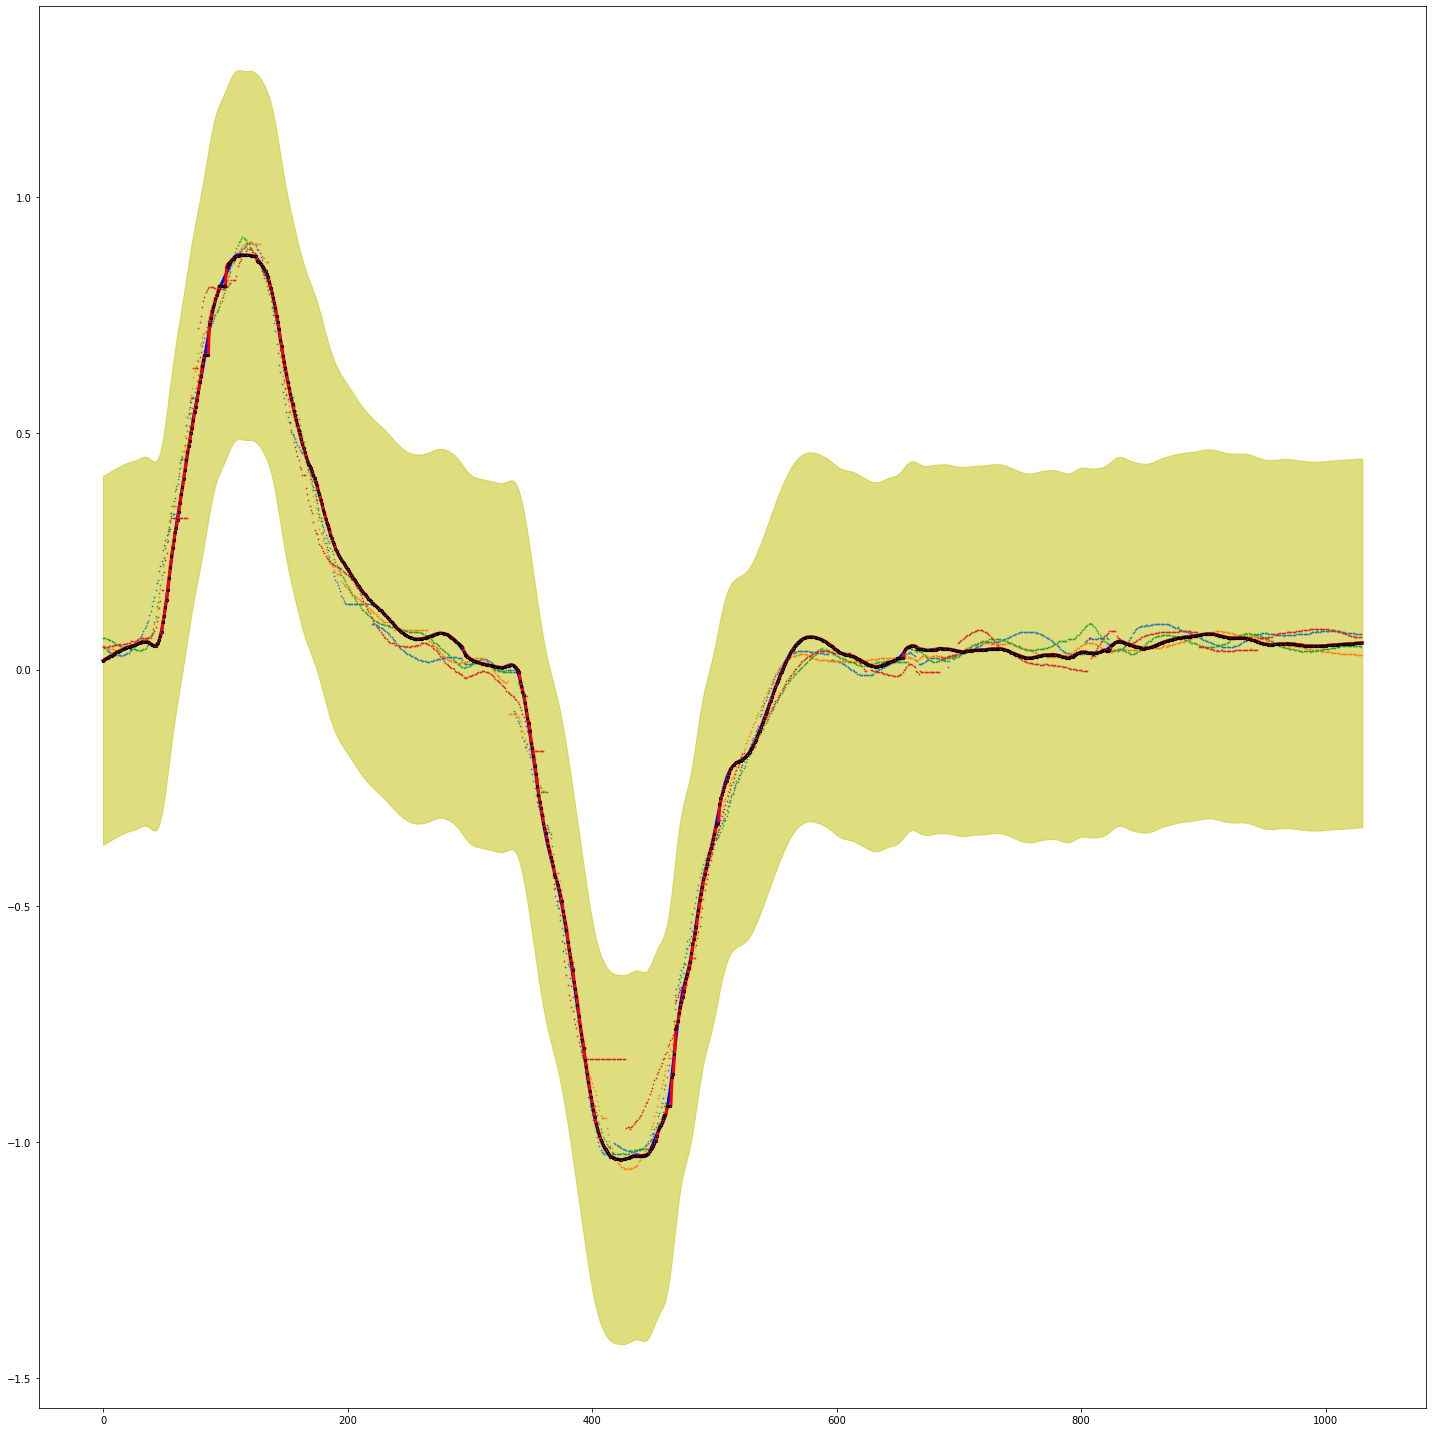

In [22]:
# mean +- cov to establsh band
#plot
plt.plot(X_, y_mean, 'b', lw=3, zorder=9)

#plt.fill_between(X_, y_mean - np.sqrt(np.diag(y_cov)),
 #                y_mean + np.sqrt(np.diag(y_cov)),
  #               alpha=0.5, color='y')




plt.fill_between(X_, y_mean - np.std(pos_vec0), y_mean + np.std(pos_vec0),alpha=0.5, color='y')






#just to show reference function, what should this be replaced by? line plot of og data?
plt.plot(X_, pos_vec0, 'r', lw=3, zorder=9)
plt.scatter(frame_vec, pos_vec1, s = 0.5)
plt.scatter(frame_vec, pos_vec2,s = 0.5)
plt.scatter(frame_vec, pos_vec3,s = 0.5)
plt.scatter(frame_vec, pos_vec4, s = 0.5)



plt.scatter(frame_vec_reshape[:, 0], pos_vec0_reshape, c='r', s=5, zorder=10, edgecolors=(0, 0, 0))
#plt.title("Initial: %s\nOptimum: %s\nLog-Marginal-Likelihood: %s"
         # % (kernel, gp.kernel_,
          #   gp.log_marginal_likelihood(gp.kernel_.theta)))
plt.tight_layout()



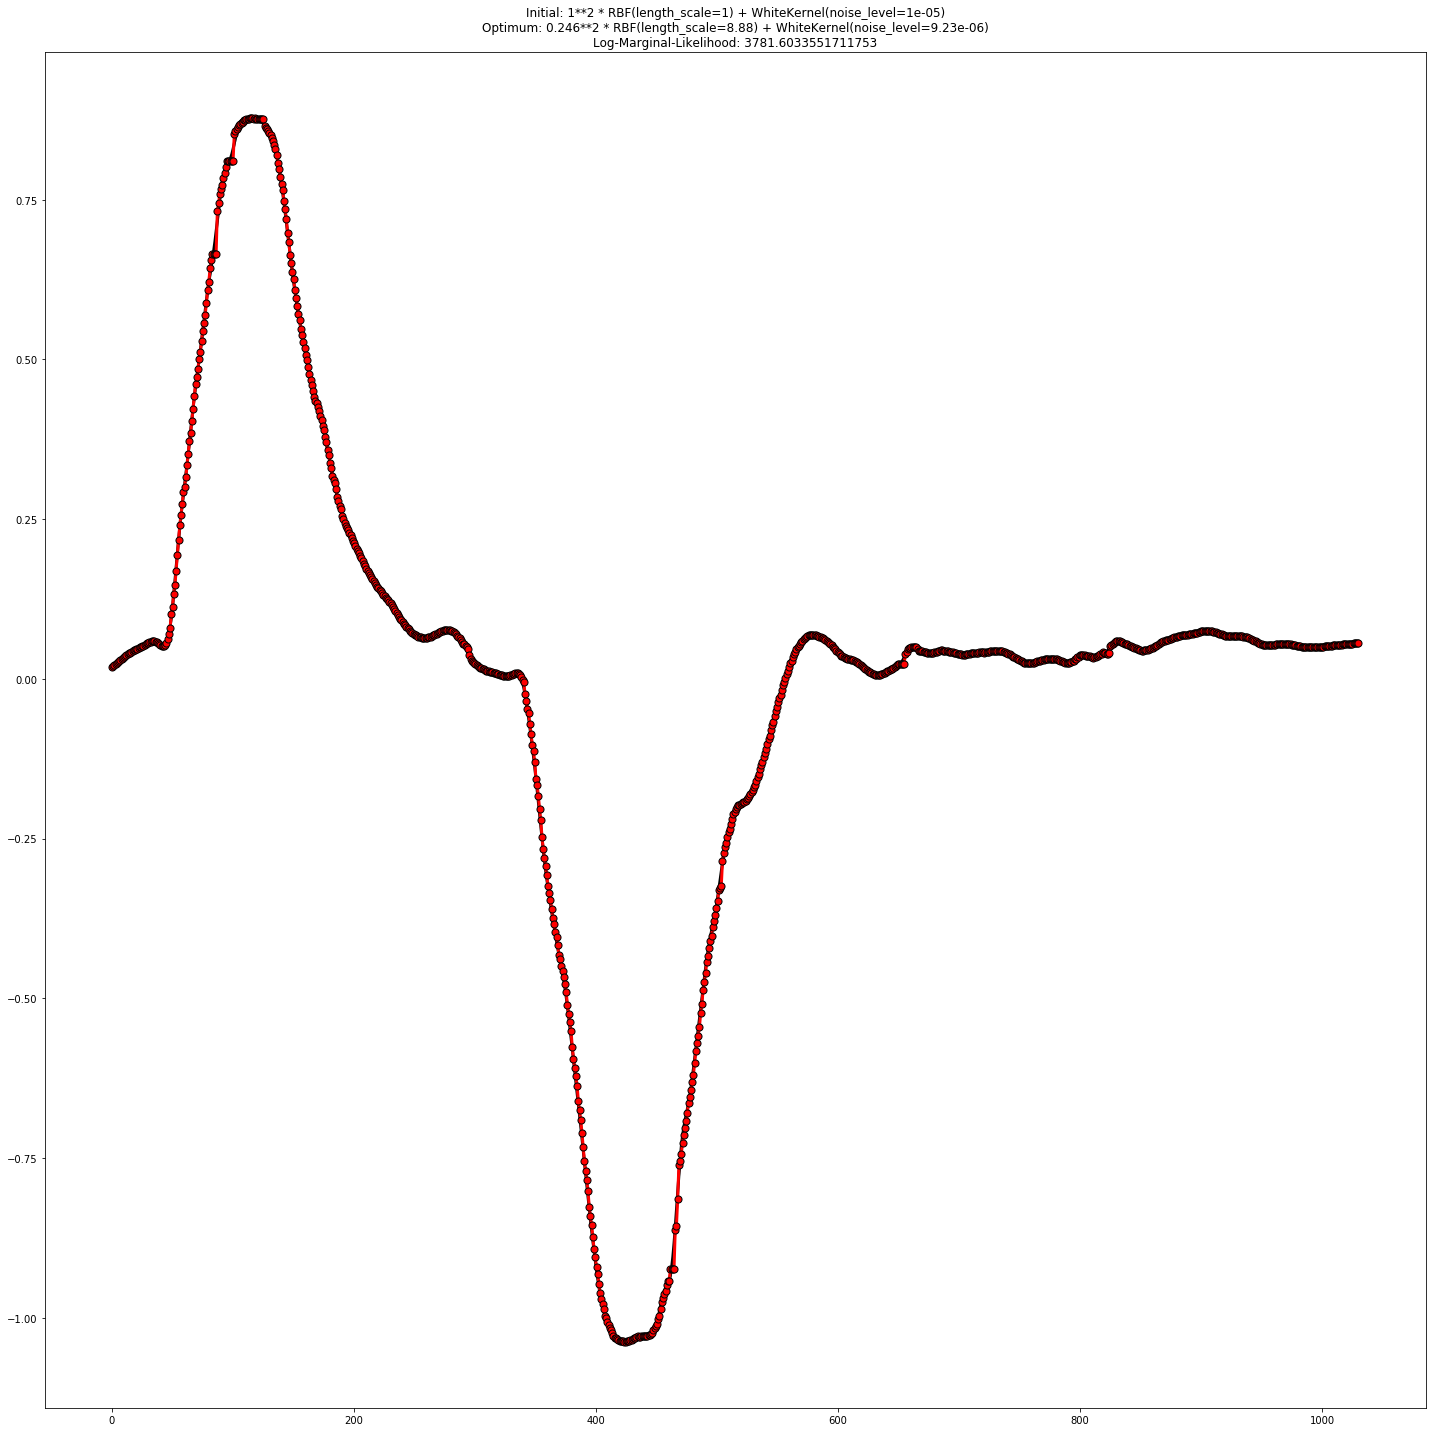

In [23]:
# Second run
plt.figure()
kernel =ConstantKernel(1.) * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 30.1)) \
    + WhiteKernel(noise_level=1e-5, noise_level_bounds=(1e-10, 1e+1))
gp = GaussianProcessRegressor(kernel=kernel,
                              alpha=0.0).fit(frame_vec_reshape, pos_vec0_reshape)
X_ = np.linspace(0, 1030, 1030)

#now y_mean  is a curved line instead of 0

y_mean, y_cov = gp.predict(X_[:, np.newaxis], return_cov=True)

y_mean = np.squeeze(y_mean)


plt.plot(X_, y_mean, 'k', lw=3, zorder=9)
plt.fill_between(X_, y_mean - np.sqrt(np.diag(y_cov)),
                 y_mean + np.sqrt(np.diag(y_cov)),
                 alpha=0.5, color='k')
plt.plot(X_, pos_vec0, 'r', lw=3, zorder=9)
plt.scatter(X_, pos_vec0_reshape, c='r', s=50, zorder=10, edgecolors=(0, 0, 0))
plt.title("Initial: %s\nOptimum: %s\nLog-Marginal-Likelihood: %s"
          % (kernel, gp.kernel_,
             gp.log_marginal_likelihood(gp.kernel_.theta)))
plt.tight_layout()


In [24]:

# Parameters

 #       theta : array-like of shape (n_kernel_params,) or None
 #           Kernel hyperparameters for which the log-marginal likelihood is
  #          evaluated. If None, the precomputed log_marginal_likelihood
   #         of ``self.kernel_.theta`` is returned.


#log_like = gpr.log_marginal_likelihood(theta =  , eval_gradient = True)

#type(log_like)

In [ ]:
## This block uses the random position vector. Each frame is a random sample from one of the five traces of a curve



random_pos_vector = []  

for i in range(len(pos_vec0)):
 random_sample = np.random.choice(finger_df[i,2:6])
 random_pos_vector.append(random_sample)



np.shape(random_pos_vector)

random_pos_vector

In [26]:
### Same process as above

plt.figure()
kernel =ConstantKernel(1.) * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 30.1)) \
    + WhiteKernel(noise_level=1e-5, noise_level_bounds=(1e-10, 1e+1))
gp = GaussianProcessRegressor(kernel=kernel,
                              alpha=0.0).fit(frame_vec_reshape, random_pos_vector)
X_ = np.linspace(0, 1030, 1030)

#now y_mean  is a curved line instead of 0

y_mean, y_cov = gp.predict(X_[:, np.newaxis], return_cov=True)

y_mean = np.squeeze(y_mean)

y_mean


array([0.04831032, 0.04819377, 0.04805881, ..., 0.06219961, 0.06199936,
       0.06169183])

<Figure size 1440x1440 with 0 Axes>

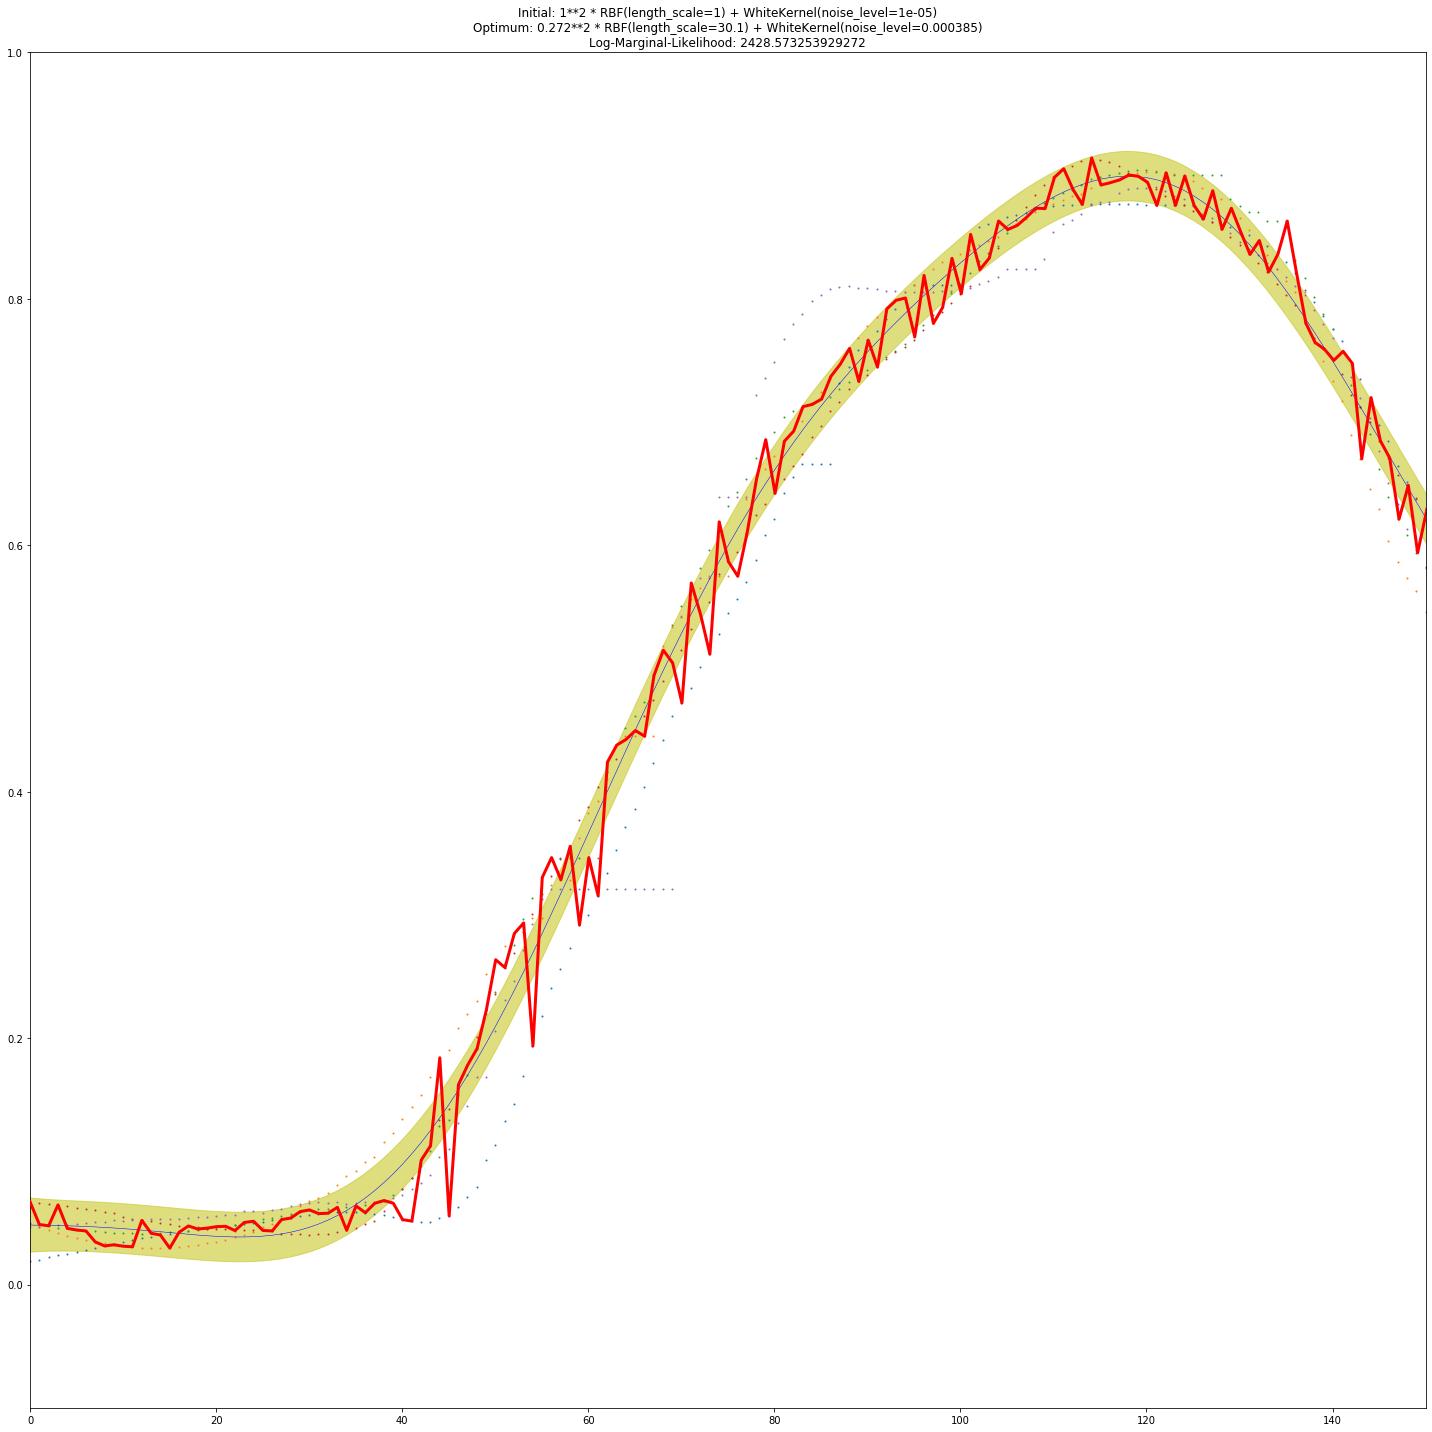

In [185]:


# mean +- cov to establsh band
#plot
plt.plot(X_, y_mean, 'b', lw=0.5, zorder=9)





plt.fill_between(X_, y_mean - np.sqrt(np.diag(y_cov)), y_mean + np.sqrt(np.diag(y_cov)),alpha=0.5, color='y')



plt.ylim((-0.1, 1)) 
plt.xlim((0, 150)) 

#just to show reference function, what should this be replaced by? line plot of og data?
plt.plot(X_, random_pos_vector, 'r', lw=3, zorder=9, label = 'random sample of five traces x-pos')
plt.scatter(frame_vec, pos_vec0, s = 1)
plt.scatter(frame_vec, pos_vec1, s = 1)
plt.scatter(frame_vec, pos_vec2,s = 1)
plt.scatter(frame_vec, pos_vec3,s = 1)
plt.scatter(frame_vec, pos_vec4, s = 1)



#plt.scatter(frame_vec_reshape[:, 0], random_pos_vector, c='r', s=5, zorder=10, edgecolors=(0, 0, 0))
plt.title("Initial: %s\nOptimum: %s\nLog-Marginal-Likelihood: %s"
 % (kernel, gp.kernel_,gp.log_marginal_likelihood(gp.kernel_.theta)))
plt.tight_layout()

plt.savefig('fig4.jpg')



In [28]:
gp.fit(frame_vec_reshape, random_pos_vector).get_params()

{'alpha': 0.0,
 'copy_X_train': True,
 'kernel__k1': 1**2 * RBF(length_scale=1),
 'kernel__k2': WhiteKernel(noise_level=1e-05),
 'kernel__k1__k1': 1**2,
 'kernel__k1__k2': RBF(length_scale=1),
 'kernel__k1__k1__constant_value': 1.0,
 'kernel__k1__k1__constant_value_bounds': (1e-05, 100000.0),
 'kernel__k1__k2__length_scale': 1.0,
 'kernel__k1__k2__length_scale_bounds': (0.01, 150),
 'kernel__k2__noise_level': 1e-05,
 'kernel__k2__noise_level_bounds': (1e-10, 10.0),
 'kernel': 1**2 * RBF(length_scale=1) + WhiteKernel(noise_level=1e-05),
 'n_restarts_optimizer': 0,
 'normalize_y': False,
 'optimizer': 'fmin_l_bfgs_b',
 'random_state': None}

In [29]:
optimized_hyperparameters = gp.kernel_.get_params()
optimized_hyperparameters



{'k1': 0.272**2 * RBF(length_scale=30.1),
 'k2': WhiteKernel(noise_level=0.000385),
 'k1__k1': 0.272**2,
 'k1__k2': RBF(length_scale=30.1),
 'k1__k1__constant_value': 0.07424688101900637,
 'k1__k1__constant_value_bounds': (1e-05, 100000.0),
 'k1__k2__length_scale': 30.08502912712669,
 'k1__k2__length_scale_bounds': (0.01, 150),
 'k2__noise_level': 0.0003849777311724087,
 'k2__noise_level_bounds': (1e-10, 10.0)}

In [30]:
optimized_hyperparameters = gp.kernel_.get_params()

constant_value = list(optimized_hyperparameters.values())[4]


noise_level = list(optimized_hyperparameters.values())[8]

length_scale = list(optimized_hyperparameters.values())[6]


constant_value_vector_vector = []
noise_level_vector = []
length_scale_vector =[]







In [31]:
#configure matrix of hyper parameters

def extract_parameters(data_frame, start,stop):
    
    #subset random_pos_vec
    
    random_pos_vec_window = data_frame[start:stop]
    frame_vec_reshape_chopped = frame_vec_reshape[start:stop]
    
    kernel =ConstantKernel(1.) * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 30.1)) + WhiteKernel(noise_level=1e-5, noise_level_bounds=(1e-10, 1e+1))
    window_gp = GaussianProcessRegressor(kernel=kernel,alpha=0.0).fit(frame_vec_reshape_chopped, random_pos_vec_window)

    
    
    optimized_hyperparameters = window_gp.kernel_.get_params()

    sigma = np.sqrt(list(optimized_hyperparameters.values())[4])


    noise_level = list(optimized_hyperparameters.values())[8]

    length_scale = list(optimized_hyperparameters.values())[6]
    
    return sigma, noise_level, length_scale
    
    #outputs vectors that match size of start to stop interval
    
    
#usage: sigma, noise_level, length_scale = extract_coeff(start, stop)

#append vector of coefficients to matrix



In [136]:

# parameter_window_matrix[:, 0] is frame number, other columns are hyperparamters 

length_scale_window_matrix = np.zeros([1030, 6])
noise_level_window_matrix = np.zeros([1030, 6])
sigma_window_matrix = np.zeros([1030, 6])

sigma_array=[]
noise_level_array = []
length_scale_array = []
#sliding window


window_size = 20

delta_size = 20

for i in range(0, len(frame_vec)-window_size,delta_size):
    
    window_start = i
    window_stop = i+window_size
    
    sigma, noise_level, length_scale = extract_parameters(random_pos_vector, window_start, window_stop)
    
    sigma_array.append(sigma)
    noise_level_array.append(noise_level)
    length_scale_array.append(length_scale)


    
   
    
    
    

In [137]:
#create a vector that maps window kernel values to frames 
sigma_array_scaled=[]


for j in range(len(sigma_array)):
     sigma_array_scaled.extend(sigma_array[j] for i in range(delta_size))

        
        
##last window of size window_size       
sigma_array                               
sigma_array_scaled.extend(sigma_array[len(sigma_array)-1] for i in range(window_size))


sigma_array_scaled = np.asarray(sigma_array_scaled)



print(np.shape(sigma_array_scaled))

sigma_array_scaled = sigma_array_scaled[0:1030]

print(np.shape(sigma_array_scaled))



(1040,)
(1030,)


In [ ]:
#create a vector that maps window kernel values to frames 


noise_level_array_scaled = []


for j in range(len(noise_level_array)):
     noise_level_array_scaled.extend(noise_level_array[j] for i in range(delta_size))
                               

            
##last window of size window_size               
            
noise_level_array_scaled.extend(noise_level_array[len(sigma_array)-1] for i in range(window_size))

noise_level_array_scaled = np.asarray(noise_level_array_scaled)

print(np.shape(noise_level_array_scaled))


noise_level_array_scaled = noise_level_array_scaled[0:1030]
noise_level_array_scaled


In [ ]:
#create a vector that maps window kernel values to frames 



length_scale_array_scaled = []


for j in range(len(length_scale_array)):
     length_scale_array_scaled.extend(length_scale_array[j] for i in range(delta_size))
                               
            
##last window of size window_size               
                             
length_scale_array_scaled.extend(length_scale_array[len(sigma_array)-1] for i in range(window_size))

length_scale_array_scaled = np.asarray(length_scale_array_scaled)



print(np.shape(length_scale_array_scaled))

length_scale_array_scaled = length_scale_array_scaled[0:1030]

np.set_printoptions(threshold=np.inf)

#print(length_scale_array_scaled)



In [194]:


ls_window_1 = np.mean(length_scale_array_scaled[0:300])

ls_window_2 = np.mean(length_scale_array_scaled[301:600])

ls_window_3 = np.mean(length_scale_array_scaled[601:1030])





nl_window_1 = np.mean(noise_level_array_scaled[0:300])
nl_window_2 = np.mean(noise_level_array_scaled[301:600])
nl_window_3 = np.mean(noise_level_array_scaled[601:1030])





sa_window_1 = np.mean(sigma_array_scaled[0:300])
sa_window_2 = np.mean(sigma_array_scaled[301:600])
sa_window_3 = np.mean(sigma_array_scaled[601:1030])


print(sa_window_1)
print(sa_window_2)
print(sa_window_3)







0.3311734456668368
0.43282752274146924
0.045820850620963915


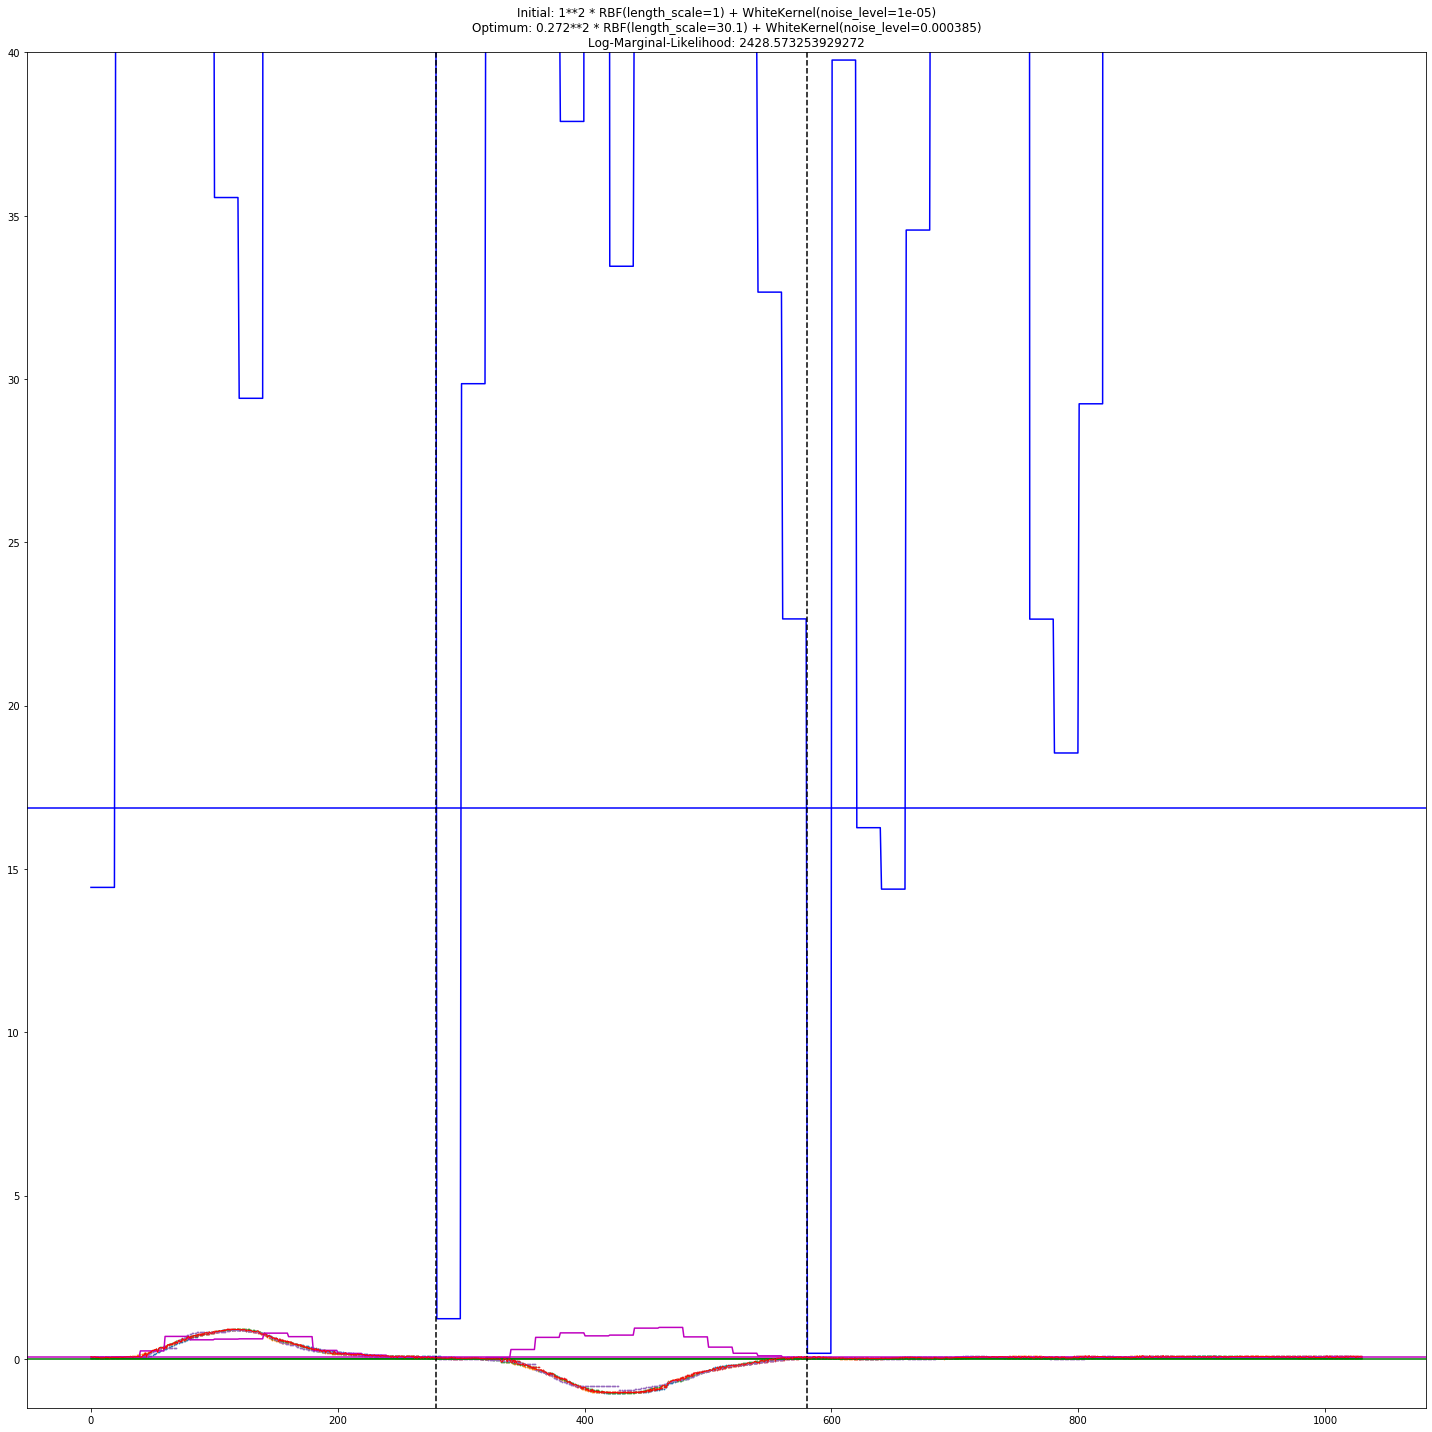

In [190]:

#just to show reference function, what should this be replaced by? line plot of og data?
plt.plot(X_, random_pos_vector, 'r', lw=1, zorder=9)
plt.scatter(frame_vec, pos_vec0, s = 0.5)
plt.scatter(frame_vec, pos_vec1, s = 0.5)
plt.scatter(frame_vec, pos_vec2,s = 0.5)
plt.scatter(frame_vec, pos_vec3,s = 0.5)
plt.scatter(frame_vec, pos_vec4, s = 0.5)



plt.ylim((-1.5, 40)) 

plt.plot(X_, length_scale_array_scaled, 'b', label = "ls window")
plt.plot(X_, noise_level_array_scaled, 'g')
plt.plot(X_, sigma_array_scaled, 'm')



plt.axhline(y=length_scale, color='b', linestyle='-')

plt.axhline(y=noise_level, color='g', linestyle='-')

plt.axhline(y=sigma, color='m', linestyle='-')


plt.axvline(x=280, ymin=-40, ymax=1,color = 'k', linestyle = '--' )
plt.axvline(x=580, ymin=-40, ymax=1, color = 'k', linestyle = '--')

#plt.scatter(frame_vec_reshape[:, 0], random_pos_vector, c='r', s=5, zorder=10, edgecolors=(0, 0, 0))
plt.title("Initial: %s\nOptimum: %s\nLog-Marginal-Likelihood: %s"
 % (kernel, gp.kernel_,gp.log_marginal_likelihood(gp.kernel_.theta)))
plt.tight_layout()
plt.savefig('fig6.jpg')

In [140]:

###APPLY LOCAL HYPERPARAMETERS


plt.figure()
plt.rcParams["figure.figsize"] = (20,20)

x1 = np.linspace(0, 300, 300)

x2 = np.linspace(301, 600, 300)

x3 = np.linspace(601, 1030, 430)


kernel = ConstantKernel(1.) * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 30.1)) + WhiteKernel(noise_level=1e-5, noise_level_bounds=(1e-10, 1e+1))


frame_vect_window_1 = frame_vec_reshape[0:300]

frame_vect_window_2 = frame_vec_reshape[301:600]

frame_vect_window_3 = frame_vec_reshape[601:1030]


pos_vec0_reshape_window_1 = random_pos_vector[0:300]

pos_vec0_reshape_window_2 = random_pos_vector[301:600]

pos_vec0_reshape_window_3 = random_pos_vector[601:1030]

pos_vec0_reshape_window_1 = np.squeeze(pos_vec0_reshape_window_1)
pos_vec0_reshape_window_2 = np.squeeze(pos_vec0_reshape_window_2)
pos_vec0_reshape_window_3 = np.squeeze(pos_vec0_reshape_window_3)



#Define kernel
#initialize hyperparameters
gp1 = GaussianProcessRegressor(kernel=kernel).fit(frame_vect_window_1, pos_vec0_reshape_window_1)
gp2 = GaussianProcessRegressor(kernel=kernel).fit(frame_vect_window_2 , pos_vec0_reshape_window_2)
gp3 = GaussianProcessRegressor(kernel=kernel).fit(frame_vect_window_3, pos_vec0_reshape_window_3)





len(pos_vec0_reshape_window_2)

299

<Figure size 1440x1440 with 0 Axes>

In [ ]:
#Find mean and cov for each window




y_mean1, y_cov1 = gp1.predict(frame_vect_window_1, return_cov=True)

y_mean2, y_cov2 = gp2.predict(frame_vect_window_2, return_cov=True)
y_mean3, y_cov3 = gp3.predict(frame_vect_window_3, return_cov=True)






np.shape(y_mean1 - np.sqrt(np.diag(y_cov1)))

print(y_mean1 - np.sqrt(np.diag(y_cov1)))

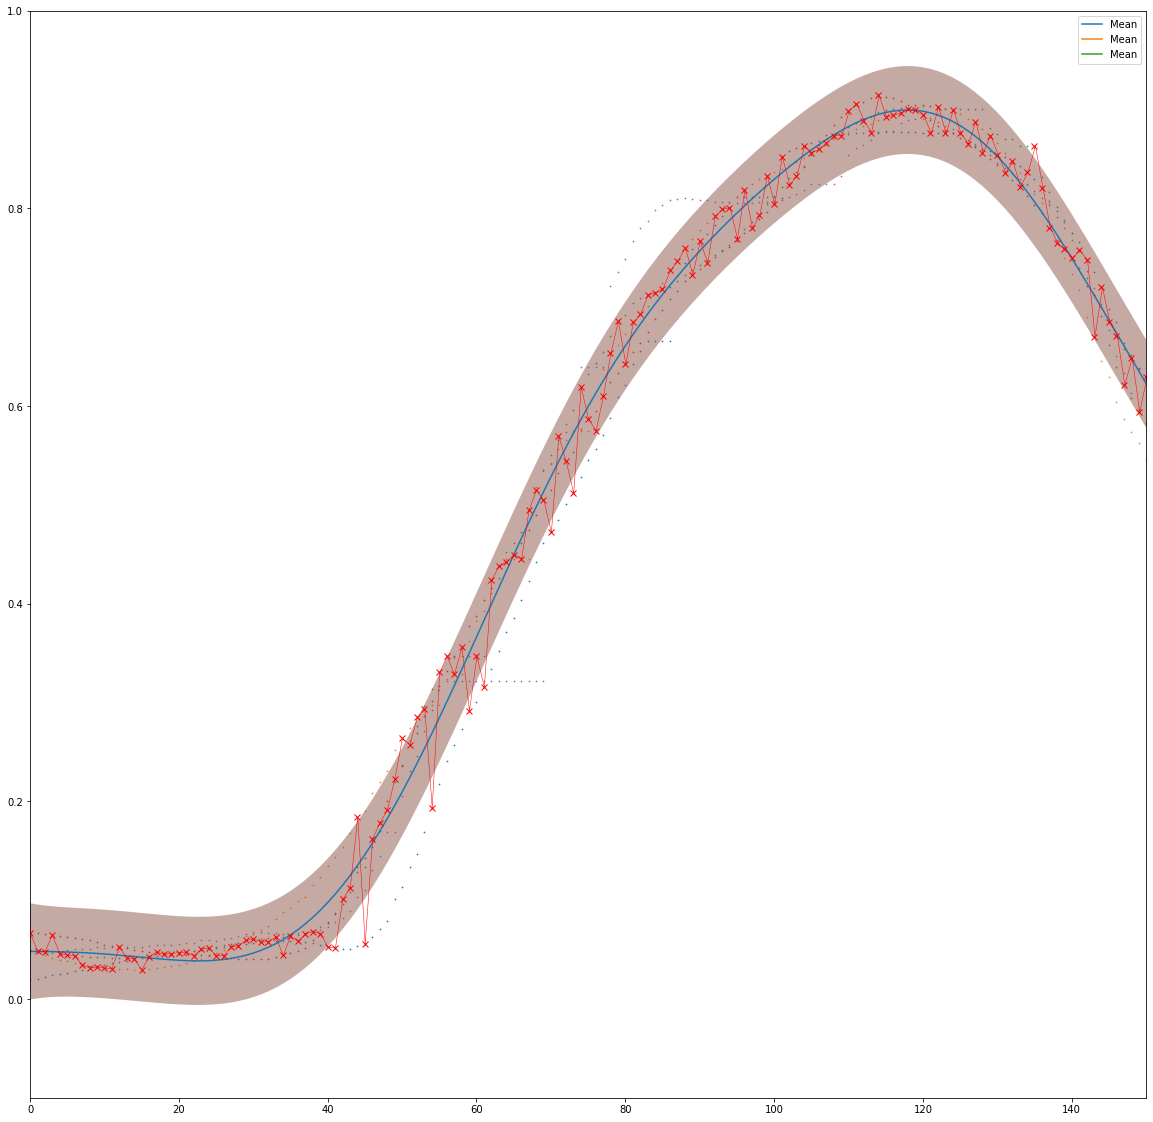

In [181]:
#just to show reference function, what should this be replaced by? line plot of og data?
plt.plot(X_, random_pos_vector, 'r', lw=.5, zorder=9)
plt.scatter(frame_vec, pos_vec0, s = 0.5)
plt.scatter(frame_vec, pos_vec1, s = 0.5)
plt.scatter(frame_vec, pos_vec2,s = 0.5)
plt.scatter(frame_vec, pos_vec3,s = 0.5)
plt.scatter(frame_vec, pos_vec4, s = 0.5)






y_mean1 = np.squeeze(y_mean1)
y_mean2 = np.squeeze(y_mean2)
y_mean3 = np.squeeze(y_mean3)


plt.ylim((-0.1, 1)) 
plt.xlim((0, 150)) 


# plot_gp(mu, cov, X, X_train=None, Y_train=None, samples=[]):


plot_gp(y_mean1, y_cov1,frame_vect_window_1, X_train = frame_vect_window_1 , Y_train = pos_vec0_reshape_window_1 )

plot_gp(y_mean2, y_cov2,frame_vect_window_2, X_train = frame_vect_window_2 , Y_train = pos_vec0_reshape_window_2 )

plot_gp(y_mean3, y_cov3,frame_vect_window_3, X_train = frame_vect_window_3 , Y_train = pos_vec0_reshape_window_3 )


plt.savefig('fig5.jpg')


In [ ]:

#plt.fill_between(pos_vec0_reshape_window_1, y_mean1 - np.sqrt(np.diag(y_cov1)), y_mean1 + np.sqrt(np.diag(y_cov1)),alpha=1, color='b')
#plt.fill_between(pos_vec0_reshape_window_2 , y_mean2 - np.sqrt(np.diag(y_cov2)), y_mean2 + np.sqrt(np.diag(y_cov2)),alpha=1, color='b')
#plt.fill_between(pos_vec0_reshape_window_3 , y_mean3 - np.sqrt(np.diag(y_cov3)), y_mean3 + np.sqrt(np.diag(y_cov3)),alpha=1, color='b')




plt.ylim((-0.1, 1)) 
plt.xlim((0, 320)) 

#plt.plot(X_, length_scale_array_scaled, 'b', label = "ls window")
#plt.plot(X_, noise_level_array_scaled, 'g')
#plt.plot(X_, sigma_array_scaled, 'm')






#plt.scatter(frame_vec_reshape[:, 0], random_pos_vector, c='r', s=5, zorder=10, edgecolors=(0, 0, 0))
plt.title("Initial: %s\nOptimum: %s\nLog-Marginal-Likelihood: %s"
 % (kernel, gp1.kernel_,gp.log_marginal_likelihood(gp.kernel_.theta)))
plt.tight_layout()

dict

In [168]:
#def log_marginal_likelihood(self, theta=None, eval_gradient=False,
 #                               clone_kernel=True)


log_1 = gp1.log_marginal_likelihood()
log_2 = gp2.log_marginal_likelihood()
log_3 = gp3.log_marginal_likelihood()


sum_log = log_1 + log_2 + log_3
sum_log




2526.865238425738